In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import walk
import json
from statsmodels import robust

#Read file from folder

In [128]:
file_list=[]
for dirpath,dirnames,filepath in walk('/Users/[USER_NAME]/Downloads/data'):
    for file in filepath:
        path=dirpath+'/'+file
        file_list.append(path)

file_list

['/Users/[USER_NAME]/Downloads/data/123802.json',
 '/Users/[USER_NAME]/Downloads/data/119509.json',
 '/Users/[USER_NAME]/Downloads/data/124352.json',
 '/Users/[USER_NAME]/Downloads/data/123995.json',
 '/Users/[USER_NAME]/Downloads/data/200633.json',
 '/Users/[USER_NAME]/Downloads/data/120546.json',
 '/Users/[USER_NAME]/Downloads/data/124773.json',
 '/Users/[USER_NAME]/Downloads/data/118170.json',
 '/Users/[USER_NAME]/Downloads/data/124731.json',
 '/Users/[USER_NAME]/Downloads/data/124727.json',
 '/Users/[USER_NAME]/Downloads/data/124737.json',
 '/Users/[USER_NAME]/Downloads/data/114456.json',
 '/Users/[USER_NAME]/Downloads/data/121922.json',
 '/Users/[USER_NAME]/Downloads/data/119414.json',
 '/Users/[USER_NAME]/Downloads/data/119506.json',
 '/Users/[USER_NAME]/Downloads/data/124311.json']

In [113]:

female_file_list=[
     '/Users/[USER_NAME]/Downloads/data/114456.json',
     '/Users/[USER_NAME]/Downloads/data/118170.json',
     '/Users/[USER_NAME]/Downloads/data/124352.json',
     '/Users/[USER_NAME]/Downloads/data/124727.json',
     '/Users/[USER_NAME]/Downloads/data/124737.json'
 ]

In [118]:
male_file_list=list(set(file_list)-set(female_file_list))
male_file_list

['/Users/[USER_NAME]/Downloads/data/120546.json',
 '/Users/[USER_NAME]/Downloads/data/200633.json',
 '/Users/[USER_NAME]/Downloads/data/123995.json',
 '/Users/[USER_NAME]/Downloads/data/121922.json',
 '/Users/[USER_NAME]/Downloads/data/124311.json',
 '/Users/[USER_NAME]/Downloads/data/124731.json',
 '/Users/[USER_NAME]/Downloads/data/123802.json',
 '/Users/[USER_NAME]/Downloads/data/119506.json',
 '/Users/[USER_NAME]/Downloads/data/119509.json',
 '/Users/[USER_NAME]/Downloads/data/124773.json',
 '/Users/[USER_NAME]/Downloads/data/119414.json']

In [5]:
def average(lst):
    return sum(lst) / len(lst)

# speedy outlier threshold calculation

In [100]:
def get_threshold(d_list):
    d_base=[]
    for i,c in enumerate(d_list):
        if i==0:
            d_base.append(max(abs(d_list[i+1]-d_list[i]),0))
        elif i==len(d_list)-1:
            d_base.append(max(abs(d_list[i]-d_list[i-1]),0))
        else:
            d_base.append(max(abs(d_list[i+1]-d_list[i]),abs(d_list[i]-d_list[i-1])))

    median_d_base=np.median(d_base)
    d_base_new=[abs(x-median_d_base) for x in d_base]

    mad_base_old=robust.mad(np.array(d_base),c=1)
    mad_base=np.median(d_base_new)
    threshold_max = np.median(d_list)+40*mad_base
    threshold_min = np.median(d_list)-40*mad_base
    return threshold_min,threshold_max

In [57]:
def fill_zero(x):
    for idx, val in enumerate(x):
        if idx == 0: continue  # skip the first element
        if val == 0:
            x[idx] = x[idx - 1]
    return x

# cleaning data for dataframe generation

reading file :  /Users/[USER_NAME]/Downloads/data/123802.json
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
reading file :  /Users/[USER_NAME]/Downloads/data/119509.json
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter : 
0 present diameter

/var/folders/38/rbqj26lx2ws9ph5gq95znkhc0000gn/T/ipykernel_9094/2326789116.py:239: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inhes" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('from_zero_rating_'+'Global'+'.png',bbox_inhes='tight')


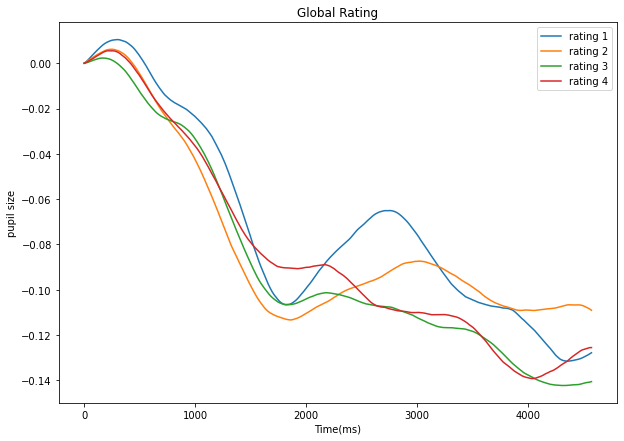

In [143]:

for file_path in file_list:
    rating_1_total=[]
    rating_2_total=[]
    rating_3_total=[]
    rating_4_total=[]
    print('reading file : ',file_path)
    participant_id=file_path.split('/')[-1:][0].split('.')[0]
    f=open(file_path)
    json_data=json.load(f)

    for trail in json_data.get('trials'):

        rating=trail.get('rating')
        file=file_path
        if rating!=0:
            base_list=trail.get('baseline')

            diameter_list=trail.get('pupil_dilation')
            # print(len(base_list) , len(diameter_list), rating)

            # Artifact Outlier removal start
            if 0 in base_list:
                # print('0 present base : ', base_list.index(0))
                base_indices = [i for i, x in enumerate(base_list) if x == 0]
                # print(base_indices)
                for index in base_indices:

                    st_index = 0 if (index-5)<0 else (index-5)
                    base_list[st_index:index]=[0 for x in range(index-st_index)]
                    # end_index = index+5 if (index+5)<len(base_list) else len(base_list)
                    # base_list[index:end_index]=[0 for x in range(end_index-index)]
            print(diameter_list)
            if 0 in diameter_list:
                print('0 present diameter : ')
                diameter_indices = [i for i, x in enumerate(diameter_list) if x == 0]
                # print(diameter_indices)
                for index in diameter_indices:

                    st_index = 0 if (index-5)<0 else (index-5)
                    diameter_list[st_index:index]=[0 for x in range(index-st_index)]
                    end_index = index+5 if (index+5)<len(base_list) else len(base_list)
                    diameter_list[index:end_index]=[0 for x in range(end_index-index)]
            # print(diameter_list)
            # Artifact Outlier removal end

            # Speed Outlier removal start

            base_list=fill_zero(base_list)


            threshold_diameter_min,threshold_diameter_max  = get_threshold(diameter_list)

            # print('before',len([i for i, x in enumerate(diameter_list) if x == 0]))
            diameter_list = [0 if x>threshold_diameter_max else x for x in diameter_list ]
            diameter_list = [0 if x<threshold_diameter_min else x for x in diameter_list ]

            dt_diameter=pd.DataFrame(diameter_list,columns=['x'])
            dt_diameter['x']=dt_diameter['x'].replace(0,np.nan)

            dt_diameter=dt_diameter.interpolate('index',limit_direction='both')

            # Speed Outlier removal end

            # smoothing data

            base_list = base_list[0:86]

            dt_diameter['x'] = dt_diameter['x'].rolling(25).mean()
            # dt_diameter=dt_diameter.dropna()

            diameter_list = dt_diameter['x'].tolist()[0:295]

            #baseline correction
            # print('base_list: ',base_list)
            avg_base = average(base_list[-30:])

            cng_from_base_list = [x-avg_base for x in diameter_list]

            if rating==1:
                rating_1_total.append(cng_from_base_list)
            elif rating==2:
                rating_2_total.append(cng_from_base_list)
            elif rating==3:
                rating_3_total.append(cng_from_base_list)
            elif rating==4:
                rating_4_total.append(cng_from_base_list)

# generate dataframe to analise rating wise data

    df_rating_1=pd.DataFrame(rating_1_total)
    df_rating_1=df_rating_1.transpose()
    df_rating_1['mean']=df_rating_1.mean(axis=1)

    df_rating_2=pd.DataFrame(rating_2_total)
    df_rating_2=df_rating_2.transpose()
    df_rating_2['mean']=df_rating_2.mean(axis=1)

    df_rating_3=pd.DataFrame(rating_3_total)
    df_rating_3=df_rating_3.transpose()
    df_rating_3['mean']=df_rating_3.mean(axis=1)

    df_rating_4=pd.DataFrame(rating_4_total)
    df_rating_4=df_rating_4.transpose()
    df_rating_4['mean']=df_rating_4.mean(axis=1)

    duration=[]

    for dur in range(295):
        duration.append(dur*(5000/295))
    plt.figure()
    figure = plt.gcf()
    figure.set_size_inches(10, 7)
    plt.title('Rating')
    plt.xlabel('Time(ms)')
    plt.ylabel('pupil size')
    if not df_rating_1.empty:
        df_rating_1=df_rating_1.dropna()
        duration_1=duration[0:df_rating_1.shape[0]]
        list_1=df_rating_1['mean'].to_list()
        f1=list_1[0]
        applied_list_1=[f1-x if x>0 else x-f1 for x in list_1]
        plt.plot(duration_1,df_rating_1['mean'],label='rating '+str(1))
    if not df_rating_2.empty:
        df_rating_2=df_rating_2.dropna()
        duration_2=duration[0:df_rating_2.shape[0]]
        list_2=df_rating_2['mean'].to_list()
        f2=list_2[0]
        applied_list_2=[f2-x if f2>0 else x-f2 for x in list_2]
        plt.plot(duration_2,df_rating_2['mean'],label='rating '+str(2))
    if not df_rating_3.empty:
        df_rating_3=df_rating_3.dropna()
        duration_3=duration[0:df_rating_3.shape[0]]
        list_3=df_rating_3['mean'].to_list()
        f3=list_3[0]
        applied_list_3=[f3-x if f3>0 else x-f3 for x in list_3]
        plt.plot(duration_3,df_rating_3['mean'],label='rating '+str(3))
    if not df_rating_4.empty:
        df_rating_4=df_rating_4.dropna()
        duration_4=duration[0:df_rating_4.shape[0]]

        list_4=df_rating_4['mean'].to_list()
        f4=list_4[0]
        applied_list_4=[f4-x if f4>0 else x-f4 for x in list_4]
        print('applied_list_4',list_4)
        plt.plot(duration_4,df_rating_4['mean'],label='rating '+str(4))
    plt.legend()
    plt.savefig('file_name'+'.png',bbox_inhes='tight')
    f.close()


reading file :  /Users/[USER_NAME]/Downloads/data/120546.json
reading file :  /Users/[USER_NAME]/Downloads/data/200633.json
reading file :  /Users/[USER_NAME]/Downloads/data/123995.json
reading file :  /Users/[USER_NAME]/Downloads/data/121922.json
reading file :  /Users/[USER_NAME]/Downloads/data/124311.json
reading file :  /Users/[USER_NAME]/Downloads/data/124731.json
reading file :  /Users/[USER_NAME]/Downloads/data/123802.json
reading file :  /Users/[USER_NAME]/Downloads/data/119506.json
reading file :  /Users/[USER_NAME]/Downloads/data/119509.json
reading file :  /Users/[USER_NAME]/Downloads/data/124773.json
reading file :  /Users/[USER_NAME]/Downloads/data/119414.json
 before shape (89, 295)
 after shape (295, 89)


/var/folders/38/rbqj26lx2ws9ph5gq95znkhc0000gn/T/ipykernel_9094/1138212534.py:223: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inhes" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('rating_global_male.png',bbox_inhes='tight')


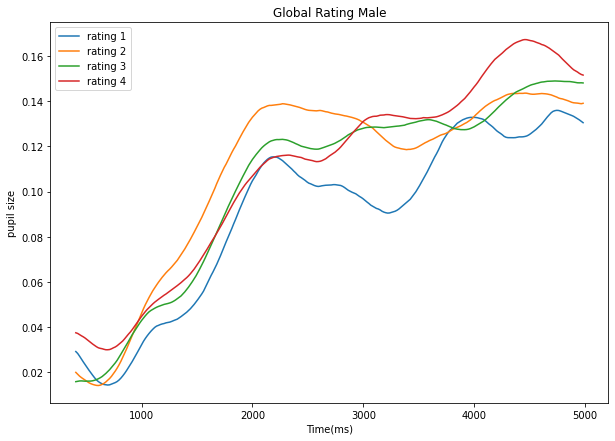

In [119]:
rating_1_total=[]
rating_2_total=[]
rating_3_total=[]
rating_4_total=[]
for file_path in male_file_list:
    print('reading file : ',file_path)
    participant_id=file_path.split('/')[-1:][0].split('.')[0]
    f=open(file_path)
    json_data=json.load(f)

    for trail in json_data.get('trials'):

        rating=trail.get('rating')
        file=file_path
        if rating!=0:
            base_list=trail.get('baseline')

            diameter_list=trail.get('pupil_dilation')
            # print(len(base_list) , len(diameter_list), rating)

            # Artifact Outlier removal
            # if 0 in base_list:
            #     # print('0 present base : ', base_list.index(0))
            #     base_indices = [i for i, x in enumerate(base_list) if x == 0]
            #     # print(base_indices)
            #     for index in base_indices:
            #
            #         st_index = 0 if (index-5)<0 else (index-5)
            #         base_list[st_index:index]=[0 for x in range(index-st_index)]
            #         # end_index = index+5 if (index+5)<len(base_list) else len(base_list)
            #         # base_list[index:end_index]=[0 for x in range(end_index-index)]
            # print(diameter_list)
            if 0 in diameter_list:
                # print('0 present diameter : ')
                diameter_indices = [i for i, x in enumerate(diameter_list) if x == 0]
                # print(diameter_indices)
                for index in diameter_indices:

                    st_index = 0 if (index-5)<0 else (index-5)
                    diameter_list[st_index:index]=[0 for x in range(index-st_index)]
                    end_index = index+5 if (index+5)<len(base_list) else len(base_list)
                    diameter_list[index:end_index]=[0 for x in range(end_index-index)]
            # print(diameter_list)
            # Speed Outlier removal base and diameter

            # d_base=[]
            # for i,c in enumerate(base_list):
            #     if i==0:
            #         d_base.append(max((base_list[i+1]-base_list[i]),base_list[i]))
            #     elif i==len(base_list)-1:
            #         d_base.append(max((base_list[i]-base_list[i-1]),base_list[i]))
            #     else:
            #         d_base.append(max((base_list[i+1]-base_list[i]),(base_list[i]-base_list[i-1])))

            # d_dialation=[]
            # for i,c in enumerate(diameter_list):
            #     if i==0:
            #         d_dialation.append(max((diameter_list[i+1]-diameter_list[i]),diameter_list[i]))
            #     elif i==len(diameter_list)-1:
            #         d_dialation.append(max((diameter_list[i]-diameter_list[i-1]),diameter_list[i]))
            #     else:
            #         d_dialation.append(max((diameter_list[i+1]-diameter_list[i]),(diameter_list[i]-diameter_list[i-1])))

            # mad_base=robust.mad(np.array(d_base))
            # threshold_base = np.median(d_base)-50*mad_base


            # threshold_base = get_threshold(base_list)
            # base_list = [0 if x<threshold_base else x for x in base_list ]
            base_list=fill_zero(base_list)

            # mad_diameter=robust.mad(np.array(d_dialation))
            # threshold_diameter = np.median(d_dialation)-50*mad_diameter
            threshold_diameter_min,threshold_diameter_max  = get_threshold(diameter_list)

            # print('before',len([i for i, x in enumerate(diameter_list) if x == 0]))
            diameter_list = [0 if x>threshold_diameter_max else x for x in diameter_list ]
            diameter_list = [0 if x<threshold_diameter_min else x for x in diameter_list ]
            # print('after',len([i for i, x in enumerate(diameter_list) if x == 0]))
            # linear interpolation base and diameter
            # dt_base=pd.DataFrame(base_list,columns=['x'])
            # dt_base['x']=dt_base['x'].replace(0,np.nan)
            # dt_base['x']=np.where((dt_base['x'].isna()), dt_base['x'].interpolate(),dt_base['x'])

            dt_diameter=pd.DataFrame(diameter_list,columns=['x'])
            dt_diameter['x']=dt_diameter['x'].replace(0,np.nan)
            # dt_diameter['x']=np.where((dt_diameter['x'].isna()), dt_diameter['x'].interpolate(),dt_diameter['x'])

            dt_diameter=dt_diameter.interpolate('index',limit_direction='both')

            # smoothing base and diameter
            # dt_base['x'] = dt_base['x'].rolling(2).mean()
            # dt_base=dt_base.dropna()

            # base_list = dt_base['x'].tolist()[0:86]
            base_list = base_list[0:86]

            dt_diameter['x'] = dt_diameter['x'].rolling(25).mean()
            # dt_diameter=dt_diameter.dropna()

            diameter_list = dt_diameter['x'].tolist()[0:295]

            #baseline correction
            # print('base_list: ',base_list)
            avg_base = average(base_list[-30:])

            cng_from_base_list = [x-avg_base for x in diameter_list]

            if rating==1:
                rating_1_total.append(cng_from_base_list)
            elif rating==2:
                rating_2_total.append(cng_from_base_list)
            elif rating==3:
                rating_3_total.append(cng_from_base_list)
            elif rating==4:
                rating_4_total.append(cng_from_base_list)
    f.close()
    # print(rating_4_total)
    # if rating_1_total:
    #     rating_1_total = update_data(rating_1_total)
    # if rating_2_total:
    #     rating_2_total = update_data(rating_2_total)
    # if rating_3_total:
    #     rating_3_total = update_data(rating_3_total)
    # if rating_4_total:
    #     rating_4_total = update_data(rating_4_total)

df_rating_1=pd.DataFrame(rating_1_total)
df_rating_1=df_rating_1.transpose()
df_rating_1['mean']=df_rating_1.mean(axis=1)
df_rating_2=pd.DataFrame(rating_2_total)
print(' before shape', df_rating_2.shape)
df_rating_2=df_rating_2.transpose()
print(' after shape', df_rating_2.shape)
df_rating_2['mean']=df_rating_2.mean(axis=1)
df_rating_3=pd.DataFrame(rating_3_total)
df_rating_3=df_rating_3.transpose()
df_rating_3['mean']=df_rating_3.mean(axis=1)
df_rating_4=pd.DataFrame(rating_4_total)
df_rating_4=df_rating_4.transpose()
df_rating_4['mean']=df_rating_4.mean(axis=1)
#
duration=[]

for dur in range(295):
    duration.append(dur*(5000/295))
plt.figure()
figure = plt.gcf()
figure.set_size_inches(10, 7)
plt.title('Global Rating Male')
plt.xlabel('Time(ms)')
plt.ylabel('pupil size')
if not df_rating_1.empty:
    # print(df_rating_1.shape)
    # duration_1=duration[0:df_rating_1.shape[0]]
    # df_rating_1_list = df_rating_1['mean'].to_list()
    # df_rating_1_threshold = get_threshold(df_rating_1_list)
    # df_rating_1_list_u = [0 if x<df_rating_1_threshold else x for x in df_rating_1_list ]
    # dt_base_rating_1=pd.DataFrame(df_rating_1_list_u,columns=['x'])
    # dt_base_rating_1['x']=dt_base_rating_1['x'].replace(0,np.nan)
    # dt_base_rating_1['x']=np.where((dt_base_rating_1['x'].isna()), dt_base_rating_1['x'].interpolate(),dt_base_rating_1['x'])
    # dt_base_rating_1=dt_base_rating_1.interpolate(limit_direction='both')
    # dt_base_rating_1['x'] = dt_base_rating_1['x'].rolling(5).mean()
    # dt_base_rating_1=dt_base_rating_1.dropna()
    duration_1=duration[0:df_rating_1.shape[0]]
    # df_rating_1['mean'] = df_rating_1['mean'].rolling(2).mean()
    # df_rating_1=df_rating_1.dropna()
    # plt.plot(duration_1,dt_base_rating_1['x'],label='rating '+str(1))
    plt.plot(duration_1,df_rating_1['mean'],label='rating '+str(1))
if not df_rating_2.empty:
    # print(df_rating_2.shape)
    # duration_2=duration[0:df_rating_2.shape[0]]
    # df_rating_2_list = df_rating_2['mean'].to_list()
    # df_rating_2_threshold = get_threshold(df_rating_2_list)
    # df_rating_2_list_u = [0 if x<df_rating_2_threshold else x for x in df_rating_2_list ]
    # dt_base_rating_2=pd.DataFrame(df_rating_2_list_u,columns=['x'])
    # dt_base_rating_2['x']=dt_base_rating_2['x'].replace(0,np.nan)
    # dt_base_rating_2['x']=np.where((dt_base_rating_2['x'].isna()), dt_base_rating_2['x'].interpolate(),dt_base_rating_2['x'])
    # dt_base_rating_2=dt_base_rating_2.interpolate(limit_direction='both')
    # dt_base_rating_2['x'] = dt_base_rating_2['x'].rolling(5).mean()
    # dt_base_rating_2=dt_base_rating_2.dropna()
    duration_2=duration[0:df_rating_2.shape[0]]
    # df_rating_2['mean'] = df_rating_2['mean'].rolling(2).mean()
    # df_rating_2=df_rating_2.dropna()
    # plt.plot(duration_2,dt_base_rating_2['x'],label='rating '+str(2))
    plt.plot(duration_2,df_rating_2['mean'],label='rating '+str(2))
if not df_rating_3.empty:
    # print(df_rating_3.shape)
    # duration_3=duration[0:df_rating_3.shape[0]]
    # df_rating_3_list = df_rating_3['mean'].to_list()
    # df_rating_3_threshold = get_threshold(df_rating_3_list)
    # df_rating_3_list_u = [0 if x<df_rating_3_threshold else x for x in df_rating_3_list ]
    # dt_base_rating_3=pd.DataFrame(df_rating_3_list_u,columns=['x'])
    # dt_base_rating_3['x']=dt_base_rating_3['x'].replace(0,np.nan)
    # dt_base_rating_3['x']=np.where((dt_base_rating_3['x'].isna()), dt_base_rating_3['x'].interpolate(),dt_base_rating_3['x'])
    # dt_base_rating_3=dt_base_rating_3.interpolate(limit_direction='both')
    # dt_base_rating_3['x'] = dt_base_rating_3['x'].rolling(5).mean()
    # dt_base_rating_3=dt_base_rating_3.dropna()
    duration_3=duration[0:df_rating_3.shape[0]]
    # df_rating_3['mean'] = df_rating_3['mean'].rolling(2).mean()
    # df_rating_3=df_rating_3.dropna()
    # plt.plot(duration_3,dt_base_rating_3['x'],label='rating '+str(3))
    plt.plot(duration_3,df_rating_3['mean'],label='rating '+str(3))
if not df_rating_4.empty:
    # print(df_rating_4.shape)
    # duration_4=duration[0:df_rating_4.shape[0]]
    # df_rating_4_list = df_rating_4['mean'].to_list()
    # df_rating_4_threshold = get_threshold(df_rating_4_list)
    # df_rating_4_list_u = [0 if x<df_rating_4_threshold else x for x in df_rating_4_list ]
    # dt_base_rating_4=pd.DataFrame(df_rating_4_list_u,columns=['x'])
    # dt_base_rating_4['x']=dt_base_rating_4['x'].replace(0,np.nan)
    # dt_base_rating_4['x']=np.where((dt_base_rating_4['x'].isna()), dt_base_rating_4['x'].interpolate(),dt_base_rating_4['x'])
    # dt_base_rating_4['x'] = dt_base_rating_4['x'].rolling(5).mean()
    # dt_base_rating_4=dt_base_rating_4.dropna()
    # dt_base_rating_4=dt_base_rating_4.interpolate(limit_direction='both')

    duration_4=duration[0:df_rating_4.shape[0]]
    # plt.plot(duration_4,dt_base_rating_4['x'],label='rating '+str(4))
    # df_rating_4['mean'] = df_rating_4['mean'].rolling(2).mean()
    # df_rating_4=df_rating_4.dropna()
    plt.plot(duration_4,df_rating_4['mean'],label='rating '+str(4))
plt.legend()
plt.savefig('rating_global_male.png',bbox_inhes='tight')

In [121]:
base_folder='/Users/technical/pupil-detection/pupil_api/'
participant_id='34234'
folder=base_folder+participant_id
filename='rating_'+participant_id+'.xlsx'
folder+'/'+filename

'/Users/technical/pupil-detection/pupil_api/34234/rating_34234.xlsx'

In [129]:
rating_1_total=[]
rating_2_total=[]
rating_3_total=[]
rating_4_total=[]
for file_path in file_list:
    print('reading file : ',file_path)
    participant_id=file_path.split('/')[-1:][0].split('.')[0]
    f=open(file_path)
    json_data=json.load(f)

    for trail in json_data.get('trials'):

        rating=trail.get('rating')
        file=file_path
        if rating!=0:
            base_list=trail.get('baseline')

            diameter_list=trail.get('pupil_dilation')
            # print(len(base_list) , len(diameter_list), rating)

            # Artifact Outlier removal
            # if 0 in base_list:
            #     # print('0 present base : ', base_list.index(0))
            #     base_indices = [i for i, x in enumerate(base_list) if x == 0]
            #     # print(base_indices)
            #     for index in base_indices:
            #
            #         st_index = 0 if (index-5)<0 else (index-5)
            #         base_list[st_index:index]=[0 for x in range(index-st_index)]
            #         # end_index = index+5 if (index+5)<len(base_list) else len(base_list)
            #         # base_list[index:end_index]=[0 for x in range(end_index-index)]
            # print(diameter_list)
            if 0 in diameter_list:
                # print('0 present diameter : ')
                diameter_indices = [i for i, x in enumerate(diameter_list) if x == 0]
                # print(diameter_indices)
                for index in diameter_indices:

                    st_index = 0 if (index-5)<0 else (index-5)
                    diameter_list[st_index:index]=[0 for x in range(index-st_index)]
                    end_index = index+5 if (index+5)<len(base_list) else len(base_list)
                    diameter_list[index:end_index]=[0 for x in range(end_index-index)]
            # print(diameter_list)
            # Speed Outlier removal base and diameter

            # d_base=[]
            # for i,c in enumerate(base_list):
            #     if i==0:
            #         d_base.append(max((base_list[i+1]-base_list[i]),base_list[i]))
            #     elif i==len(base_list)-1:
            #         d_base.append(max((base_list[i]-base_list[i-1]),base_list[i]))
            #     else:
            #         d_base.append(max((base_list[i+1]-base_list[i]),(base_list[i]-base_list[i-1])))

            # d_dialation=[]
            # for i,c in enumerate(diameter_list):
            #     if i==0:
            #         d_dialation.append(max((diameter_list[i+1]-diameter_list[i]),diameter_list[i]))
            #     elif i==len(diameter_list)-1:
            #         d_dialation.append(max((diameter_list[i]-diameter_list[i-1]),diameter_list[i]))
            #     else:
            #         d_dialation.append(max((diameter_list[i+1]-diameter_list[i]),(diameter_list[i]-diameter_list[i-1])))

            # mad_base=robust.mad(np.array(d_base))
            # threshold_base = np.median(d_base)-50*mad_base


            # threshold_base = get_threshold(base_list)
            # base_list = [0 if x<threshold_base else x for x in base_list ]
            base_list=fill_zero(base_list)

            # mad_diameter=robust.mad(np.array(d_dialation))
            # threshold_diameter = np.median(d_dialation)-50*mad_diameter
            threshold_diameter_min,threshold_diameter_max  = get_threshold(diameter_list)

            # print('before',len([i for i, x in enumerate(diameter_list) if x == 0]))
            diameter_list = [0 if x>threshold_diameter_max else x for x in diameter_list ]
            diameter_list = [0 if x<threshold_diameter_min else x for x in diameter_list ]
            # print('after',len([i for i, x in enumerate(diameter_list) if x == 0]))
            # linear interpolation base and diameter
            # dt_base=pd.DataFrame(base_list,columns=['x'])
            # dt_base['x']=dt_base['x'].replace(0,np.nan)
            # dt_base['x']=np.where((dt_base['x'].isna()), dt_base['x'].interpolate(),dt_base['x'])

            dt_diameter=pd.DataFrame(diameter_list,columns=['x'])
            dt_diameter['x']=dt_diameter['x'].replace(0,np.nan)
            # dt_diameter['x']=np.where((dt_diameter['x'].isna()), dt_diameter['x'].interpolate(),dt_diameter['x'])

            dt_diameter=dt_diameter.interpolate('index',limit_direction='both')

            # smoothing base and diameter
            # dt_base['x'] = dt_base['x'].rolling(2).mean()
            # dt_base=dt_base.dropna()

            # base_list = dt_base['x'].tolist()[0:86]
            base_list = base_list[0:86]

            dt_diameter['x'] = dt_diameter['x'].rolling(25).mean()
            # dt_diameter=dt_diameter.dropna()

            diameter_list = dt_diameter['x'].tolist()[0:295]

            #baseline correction
            # print('base_list: ',base_list)
            avg_base = average(base_list[-30:])

            cng_from_base_list = [x-avg_base for x in diameter_list]

            if rating==1:
                rating_1_total.append(cng_from_base_list)
            elif rating==2:
                rating_2_total.append(cng_from_base_list)
            elif rating==3:
                rating_3_total.append(cng_from_base_list)
            elif rating==4:
                rating_4_total.append(cng_from_base_list)

    # print(rating_4_total)
    # if rating_1_total:
    #     rating_1_total = update_data(rating_1_total)
    # if rating_2_total:
    #     rating_2_total = update_data(rating_2_total)
    # if rating_3_total:
    #     rating_3_total = update_data(rating_3_total)
    # if rating_4_total:
    #     rating_4_total = update_data(rating_4_total)

    df_rating_1=pd.DataFrame(rating_1_total)
    df_rating_1=df_rating_1.transpose()
    df_rating_1['mean']=df_rating_1.mean(axis=1)
    df_rating_1['sd']=df_rating_1.std(axis=1)
    df_rating_1['min']=df_rating_1.min(axis=1)
    df_rating_1['max']=df_rating_1.max(axis=1)
    df_rating_2=pd.DataFrame(rating_2_total)
    # print('shape', df_rating_2.shape)
    df_rating_2=df_rating_2.transpose()
    df_rating_2['mean']=df_rating_2.mean(axis=1)
    df_rating_2['sd']=df_rating_2.std(axis=1)
    df_rating_2['min']=df_rating_2.min(axis=1)
    df_rating_2['max']=df_rating_2.max(axis=1)
    df_rating_3=pd.DataFrame(rating_3_total)
    df_rating_3=df_rating_3.transpose()
    df_rating_3['mean']=df_rating_3.mean(axis=1)
    df_rating_3['sd']=df_rating_3.std(axis=1)
    df_rating_3['min']=df_rating_3.min(axis=1)
    df_rating_3['max']=df_rating_3.max(axis=1)
    df_rating_4=pd.DataFrame(rating_4_total)
    df_rating_4=df_rating_4.transpose()
    df_rating_4['mean']=df_rating_4.mean(axis=1)
    df_rating_4['sd']=df_rating_4.std(axis=1)
    df_rating_4['min']=df_rating_4.min(axis=1)
    df_rating_4['max']=df_rating_4.max(axis=1)

    folder=base_folder+participant_id
    filename_1='rating_1_'+participant_id+'.xlsx'
    filename_2='rating_2_'+participant_id+'.xlsx'
    filename_3='rating_3_'+participant_id+'.xlsx'
    filename_4='rating_4_'+participant_id+'.xlsx'

    df_rating_1=df_rating_1.dropna()
    df_rating_1.to_excel('global_rating_1.xlsx')
    df_rating_2=df_rating_2.dropna()
    df_rating_2.to_excel('global_rating_2.xlsx')
    df_rating_3=df_rating_3.dropna()
    df_rating_3.to_excel('global_rating_3.xlsx')
    df_rating_4=df_rating_4.dropna()
    df_rating_4.to_excel('global_rating_4.xlsx')

    f.close()

reading file :  /Users/[USER_NAME]/Downloads/data/123802.json
reading file :  /Users/[USER_NAME]/Downloads/data/119509.json
reading file :  /Users/[USER_NAME]/Downloads/data/124352.json
reading file :  /Users/[USER_NAME]/Downloads/data/123995.json
reading file :  /Users/[USER_NAME]/Downloads/data/200633.json
reading file :  /Users/[USER_NAME]/Downloads/data/120546.json
reading file :  /Users/[USER_NAME]/Downloads/data/124773.json
reading file :  /Users/[USER_NAME]/Downloads/data/118170.json
reading file :  /Users/[USER_NAME]/Downloads/data/124731.json
reading file :  /Users/[USER_NAME]/Downloads/data/124727.json
reading file :  /Users/[USER_NAME]/Downloads/data/124737.json
reading file :  /Users/[USER_NAME]/Downloads/data/114456.json
reading file :  /Users/[USER_NAME]/Downloads/data/121922.json
reading file :  /Users/[USER_NAME]/Downloads/data/119414.json
reading file :  /Users/[USER_NAME]/Downloads/data/119506.json
reading file :  /Users/[USER_NAME]/Downloads/data/124311.json
